imported
loaded


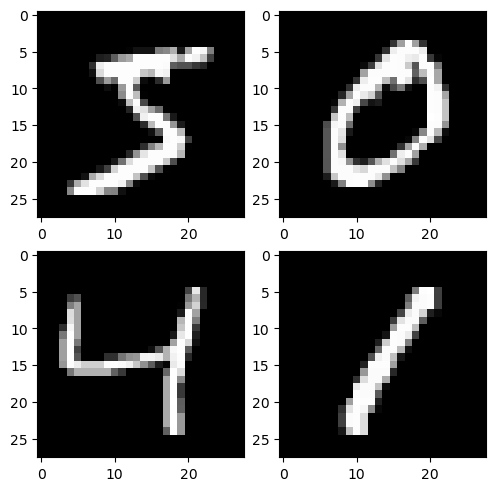

In [1]:
from glio.importsall import *
from glio.datasets import MNIST
print('imported')
dstrain, dstest = MNIST.get_mnist_classification()
print('loaded')
dstrain.preview()

In [2]:
class SLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = LinearBlock(28*28, 10, act=nn.Softmax(dim=1), flatten=True)
    
    def forward(self,x):
        return self.linear(x)

def get_model(): return SLP()
print(f'{count_parameters(get_model()) = }')
gsummary(get_model(), (1, 1, 28,28))

count_parameters(get_model()) = 7850
path                                         module                                       input size               output size              params    buffers   
__main__.SLP/linear/0                        torch.nn.modules.flatten.Flatten             (1, 1, 28, 28)           (1, 784)                 0         0         
__main__.SLP/linear/1                        torch.nn.modules.linear.Linear               (1, 784)                 (1, 10)                  7850      0         
__main__.SLP/linear/2                        torch.nn.modules.activation.Softmax          (1, 10)                  (1, 10)                  0         0         


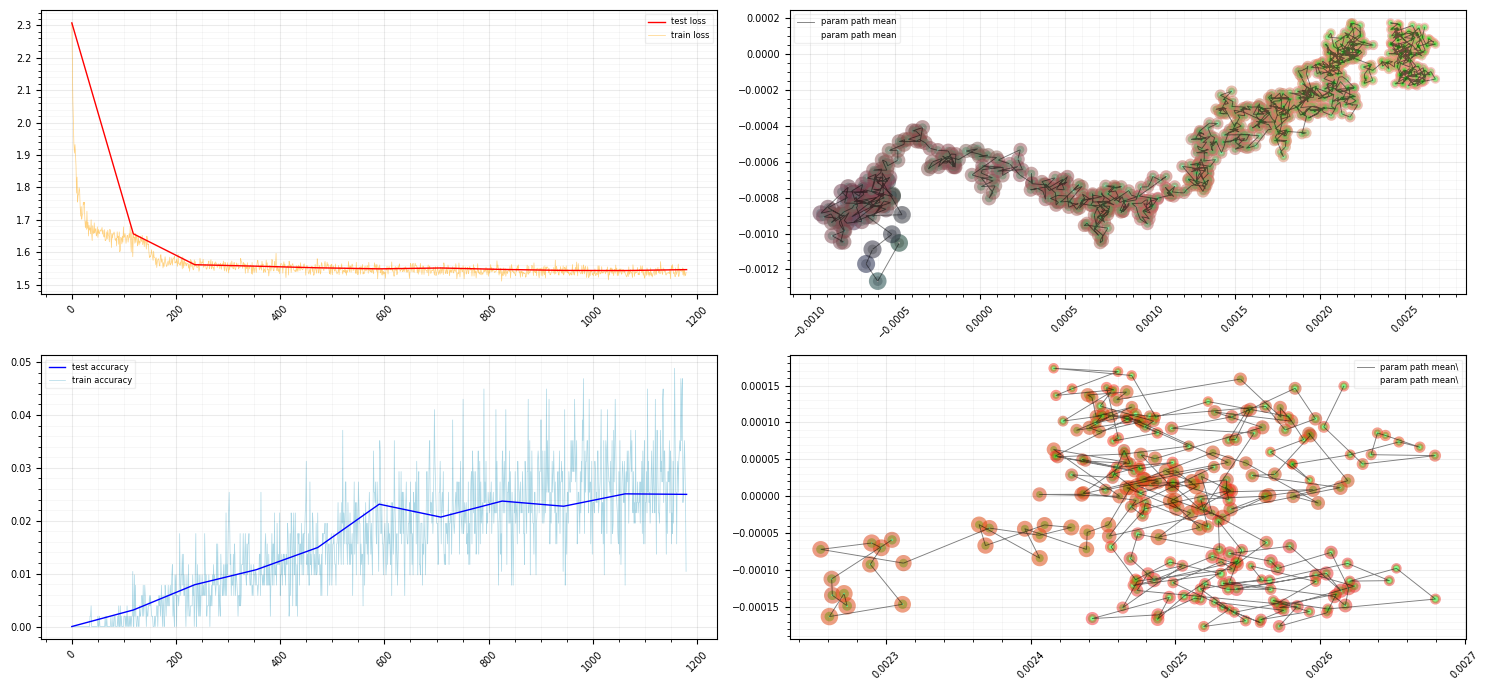

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉     | 10/10 | 5.83s/ops, elapsed: 52.49s, rem: 5.83s | 

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉  | 20/20 | 77.24ops/s, elapsed: 246ms, rem: 13ms | 
train loss:                              last = 1.538, min = 1.510, max = 2.307
test loss:                               last = 1.543, min = 1.543, max = 2.308
train accuracy:                          last = 0.010, min = 0.000, max = 0.049
test accuracy:                           last = 0.025, min = 0.000, max = 0.025

| metric | n | min | max | first | last |
| :- | :- | :- | :- | :- | :- |
| grad std | 1180 | 0.0006 | 0.0082 | 0.0042 | 0.0023 |
| grad-update angle | 1180 | 1.3517 | 1.8090 | 1.6791 | 1.5447 |
| grad-update mean | 1180 | 0.0004 | 0.0047 | 0.0025 | 0.0015 |
| last grads mean | 1179 | 0.0006 | 0.0070 | 0.0045 | 0.0017 |
| last updates std | 1179 | 0.0005 | 0.0062 | 0.0047 | 0.0014 |
| param max | 1180 | 0.0565 | 0.6615 | 0.0565 | 0.6597 |
| param mean | 1180 | -0.0001 | -0.0001 | -0.0001 | -0.0001 |
| param min | 1180 | -0.6360 | -0.0523 | -0.0523 | -0.6359 |
| param var | 1180 | 0.0004 | 0.0103 | 0.0004 | 0.0103 |
| train accuracy | 1180 | 0.0000 | 0.0488 | 0.0000 | 0.0104 |
| test accuracy | 11 | 0.0000 | 0.0251 | 0.0000 | 0.0250 |
| test accuracy max | 11 | 0.0000 | 0.0879 | 0.0000 | 0.0859 |
| test accuracy median | 11 | 0.0000 | 0.0205 | 0.0000 | 0.0205 |
| test accuracy min | 11 | 0.0000 | 0.0037 | 0.0000 | 0.0037 |
| train loss | 1180 | 1.5104 | 2.3067 | 2.3067 | 1.5375 |
| test loss | 11 | 1.5432 | 2.3080 | 2.3080 | 1.5460 |
| test loss max | 11 | 1.6003 | 2.3129 | 2.3129 | 1.6046 |
| test loss median | 11 | 1.5446 | 2.3085 | 2.3085 | 1.5503 |
| test loss min | 11 | 1.4936 | 2.3020 | 2.3020 | 1.4960 |
| time | 1180 | 0.7167 | 57.6685 | 0.7167 | 57.6685 |
| update angle | 1180 | 0.0065 | 0.3471 | 0.2030 | 0.0222 |
| update var | 1180 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |


In [3]:
from torchzero.optim.first_order.gd import GD
with seeded_rng(): MODEL = get_model()
LR = 1
MAGN = None
BATCH_SIZE = 512
N_EPOCHS = 10
LOSS_FN = nn.CrossEntropyLoss()
METRIC_STEP = 1

with seeded_rng():
    DLTRAIN = DataLoader(dstrain, BATCH_SIZE, shuffle=True, **seed0_kwargs)
    DLTEST = DataLoader(dstest, BATCH_SIZE, shuffle=False, **seed0_kwargs)

OPT = GD(MODEL.parameters(), lr = LR)
#SCHED = lr_scheduler.CosineAnnealingLR(OPT, N_EPOCHS)
SCHED = None

CALLBACKS = (LogLossCB(),

            SaveForwardChannelImagesCB(dstest[0][0].unsqueeze(0)),
            MetricAccuracyCB(),
            LogParamDistCB(METRIC_STEP),
            LogParamPathCB(METRIC_STEP),
            LogUpdateDistCB(METRIC_STEP),
            LogUpdatePathCB(METRIC_STEP),
            LogLastUpdatesAngleCB(METRIC_STEP),
            LogGradDistCB(METRIC_STEP),
            LogGradUpdateAngleCB(METRIC_STEP),
            LogGradPathCB(METRIC_STEP),
            LogLastGradsAngleCB(METRIC_STEP),
            LogTimeCB(),
            #LogLRCB(),
            #LogOptimizerParamCB('magn'),
            DisplayLoggerTableCB(),
            AccelerateCB("no"),
            PerformanceTweaksCB(True),
            SaveLastCB(),
            LivePlotCB(1000, plot_keys = ("4plotsplot","10metrics01"),path_keys=("4plotspath250",)),
            SimpleProgressBarCB(),
            OneBatchClosureCB(),
            #GradientFreeWithZeroGradCB(),
            #OneBatchClosureWithNoBackwardCB(),
)
clean_mem()

# MODEL = gnn.LSUV(MODEL, DLTRAIN, max_iter=5)

LEARNER_NAME = f"RandomOptimizer lr{LR:.0e} magn{LR:.0e}"
learner = Learner(MODEL, LEARNER_NAME, CALLBACKS, loss_fn=LOSS_FN, optimizer=OPT, scheduler=SCHED, )
learner.fit(N_EPOCHS, DLTRAIN, DLTEST,test_on_interrupt=False)